In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List all files in the Colab Notebooks directory
directory = '/content/drive/MyDrive/Colab Notebooks/'
for filename in os.listdir(directory):
    print(filename)


normalized_text.json
NLP full course.ipynb
internship phase 6:EDA.ipynb


In [ ]:
import json  # Import the json module
file_path = '/content/drive/MyDrive/Colab Notebooks/normalized_text.json'

# Load JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Preview the data
print(data)  # Display first 3 entries

[{'id': 'section_001', 'page_number': 1, 'text': "ফুলের বিবাহ বঙ্কিমচন্দ্র চট্টোপাধ্যায় [লেখক-পরিচিতি ঃ বন্কিমচন্দ্র চট্টোপাধ্যায় ২৬শে জুন ১৮৩৮ সালে পশ্চিমবঙ্গের চব্বিশ পরগনা জেলার অন্তর্গত কাঠালপাড়া গ্রামে জন্মগ্রহণ করেন। তিনি ১৮৫৮ সালে কলকাতা বিশ্ববিদ্যালয় থেকে বি.এ.পরীক্ষায় উত্তীর্ণ হন এবং সে বছরই ডেপুটি ম্যাজিস্ট্রেট ও ডেপুটি কালেক্টর পদে চাকরিতে নিয়ুক্ত হন। বন্কিমচন্দ্র তেত্রিশ বছর একই পদে চাকরি করে ১৮৯১ সালে অবসর গ্রহণ করেন। তিনি পাঠ্যাবস্থায়ই সাহিত্যচর্চা শুরু করেন। তার অসামান্য কৃতিত্ব প্রকাশ পেয়েছে পাশ্চাত্য ভাবাদর্শে বাংলা উপন্যাস রচনার পথিকৃৎ হিসেবে । ১৮৬৫ সালে প্রকাশিত তার প্রথম বাংলা উপন্যাস দুর্গেশনন্দিনী বাংলা কথাসাহিত্যে এক নবদিগন্ত উন্মোচন করে। তার অন্যান্য উপন্যাসহলো : কপালকুণডলা, মৃণালিনী, বিষবৃক্ষ, ইন্দিরা, যুগলাঙগুরীয়, রাধারানী, চন্দ্রশেখর, রজনী, কৃষ্ণকান্তের উইল, রাজসিংহ, আনন্দমঠ, দেবী চৌধুরানী ও সীতারাম। প্রবন্ধ সাহিত্যেও বন্কিমচন্দ্র বন্কিমচন্দ্র চট্টোপাধ্যায় ১৮৯৪ সালের ৮ই এপ্রিল মৃত্যুবরণ করেন ॥] বৈশাখ মাস বিবাহের মাস। আমি ১লা বৈশাখে নসী বাবুর ফুলবাগা

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [ ]:
all_words = []
for entry in data:
    words = entry['text'].split()  # Split the text into individual words
    all_words.extend(words)
# Total and unique word count
total_words = len(all_words)
unique_words = len(set(all_words))

print(f"Total Words: {total_words}")
print(f"Unique Words: {unique_words}")


Total Words: 2932
Unique Words: 1809


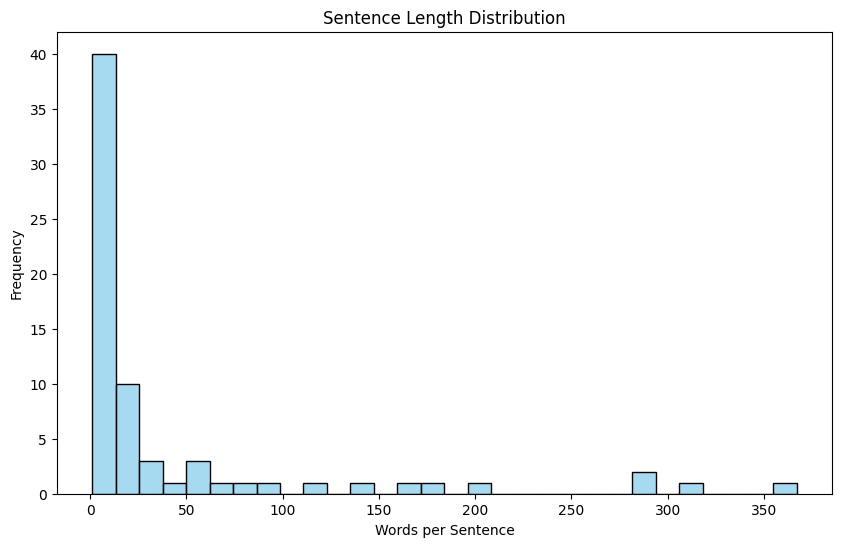

Average Sentence Length: 42.54


In [ ]:
import re

sentence_lengths = []

for entry in data:
    # Split text into sentences using common sentence-ending punctuation
    sentences = re.split(r'[.!?]', entry['text'])
    sentences = [s.strip() for s in sentences if s.strip()]  # Remove empty strings
    sentence_lengths.extend([len(s.split()) for s in sentences])

# Plotting sentence length distribution
plt.figure(figsize=(10,6))
sns.histplot(sentence_lengths, bins=30, color='skyblue')
plt.title('Sentence Length Distribution')
plt.xlabel('Words per Sentence')
plt.ylabel('Frequency')
plt.show()

print(f"Average Sentence Length: {sum(sentence_lengths) / len(sentence_lengths):.2f}")


In [ ]:
# Count punctuation marks and special characters
punctuation_counts = Counter(re.findall(r'[^\w\s]', ' '.join(all_words)))

print("Punctuation and special character Frequency:")
for char, count in punctuation_counts.most_common():
    print(f"'{char}': {count}")


Punctuation and special character Frequency:
'া': 1668
'ে': 1014
'্': 956
'ি': 932
'ু': 387
'়': 359
'ো': 215
',': 203
'।': 188
'ী': 161
'-': 69
'ৃ': 54
'ং': 53
'ূ': 43
''': 35
'ঁ': 27
';': 24
'.': 22
'?': 21
'ৌ': 13
'“': 13
'!': 12
'”': 12
'ৈ': 10
'ঃ': 7
':': 6
'[': 4
']': 4
'(': 3
')': 3
'"': 2
'+': 2
'=': 2
'॥': 1
'‘': 1
'’': 1
'–': 1
'•': 1


In [ ]:
from nltk.corpus import stopwords

# Download stopwords if not already done
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Download stopwords if not already done
import nltk
nltk.download('stopwords')

# ... (your previous code) ...

# Get the English stop words (you might need to adjust this for Bengali)
stop_words = set(stopwords.words('english'))

# Filter out stop words from all_words
filtered_words = [word for word in all_words if word.lower() not in stop_words]

# Count frequency
word_freq = Counter(filtered_words)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!apt-get install fonts-noto -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 20 not upgraded.
Need to get 317 MB of archives.
After this operation, 789 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:2022

In [ ]:
!fc-list | grep "Noto Sans Bengali"


<ipython-input-24-9934422cd82e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corrected_words, y=list(counts), palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Bengali.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Bengali.
  fig.canvas.print_figure(bytes_io, **kw)


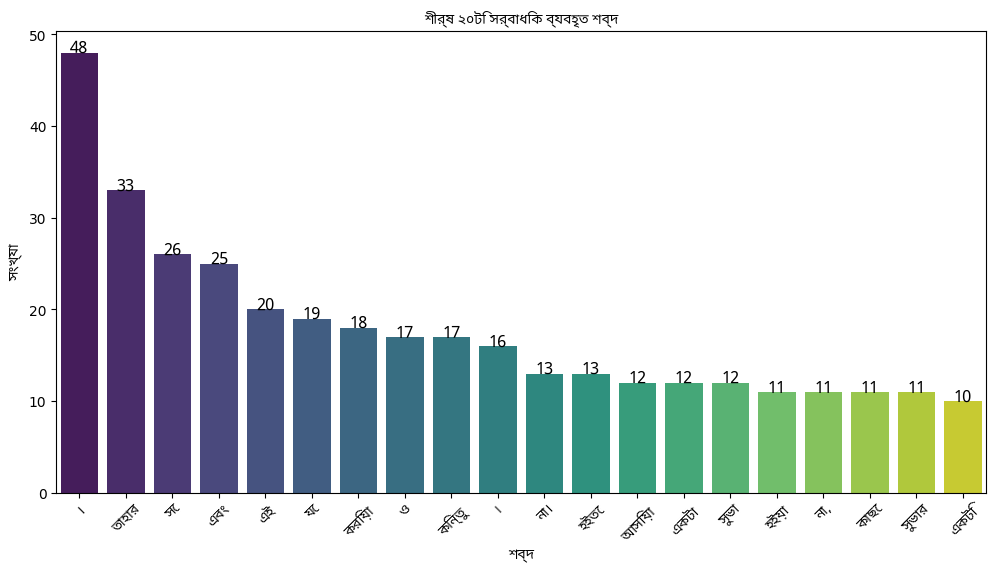

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set the font path for Bengali
bangla_font_path = "/usr/share/fonts/truetype/noto/NotoSansBengali-Regular.ttf"
bangla_font = fm.FontProperties(fname=bangla_font_path)

# Fix minor spelling mistakes (requires bnunicodenormalizer)
try:
    from bnunicodenormalizer import Normalizer
    normalizer = Normalizer()
    corrected_words = [normalizer.fix_spelling(word) for word in words]
except ImportError:
    corrected_words = words  # If library not installed, use original words

# Plotting the top 20 words
plt.figure(figsize=(12,6))
ax = sns.barplot(x=corrected_words, y=list(counts), palette="viridis")

# Show values on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontproperties=bangla_font)

# Apply Bengali font
plt.title('শীর্ষ ২০টি সর্বাধিক ব্যবহৃত শব্দ', fontproperties=bangla_font)
plt.xlabel('শব্দ', fontproperties=bangla_font)
plt.ylabel('সংখ্যা', fontproperties=bangla_font)
plt.xticks(rotation=45, fontproperties=bangla_font)

plt.show()
